<h1 style="color:Blue; padding:20px; text-align:center; border-radius:10px">01. Categorical Data Visualization</h1>

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-size: 110%">
    <p>Data visualization helps in anlysing the features of the data and helps in feature selction. In this section we will </p>
    <ol>
        <li>Import Cleaned Data.</li>
        <li>Split in Categorical and Numerical Features.</li>
        <li>Visualize Categorical Data.</li>
        <li>Visualize Target Data.</li>
    </ol>
</div>

### Standard Imports.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import klib as kl
import matplotlib.pyplot as plt

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Disable pretty
%pprint

%matplotlib inline

pd.set_option('display.max_columns', None)
sns.set() 

Pretty printing has been turned OFF


In [3]:
# Global parameters for figure
plt.rcParams["figure.figsize"] = [10.00, 8.00]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.autolayout"] = True

In [71]:
# Converts a categorical fearture to a dataframe with category_labels, counts, and probability
def convert_to_df(feature,df):
    cols = len(df[feature].unique())

    data_gender = np.concatenate((
        np.array(df[feature].unique()),
        np.array(df[feature].value_counts()),
        df[feature].value_counts() / len(df[feature])), axis=0).reshape(3,cols).T

    df = pd.DataFrame(data_gender,
                       columns=[feature, 'counts','probability'])
    return df

### 1. Import Cleaned Data.

In [72]:
# Loading the Student's data
data = pd.read_csv('./data/xAPI-Edu-Data_cleaned.csv')
data = kl.data_cleaning(data)

Long column names detected (>25 characters). Consider renaming the following columns ['parent_school_satisfaction'].
Shape of cleaned data: (478, 17)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.05 MB (-83.33%)



In [73]:
# Cheack the data is properly loaded
data.head()

,gender,nationality,place_of_birth,stage_id,grade_id,section_id,topic,semester,relation,raised_hands,visited_resources,announcements_view,discussion,parent_answering_survey,parent_school_satisfaction,student_absence_days,class
0,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [74]:
# Data Characteristics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   gender                      478 non-null    category
 1   nationality                 478 non-null    category
 2   place_of_birth              478 non-null    category
 3   stage_id                    478 non-null    category
 4   grade_id                    478 non-null    category
 5   section_id                  478 non-null    category
 6   topic                       478 non-null    category
 7   semester                    478 non-null    category
 8   relation                    478 non-null    category
 9   raised_hands                478 non-null    int8    
 10  visited_resources           478 non-null    int8    
 11  announcements_view          478 non-null    int8    
 12  discussion                  478 non-null    int8    
 13  parent_answering_sur

### 2. Split in Categorical and Numerical Features.

In [75]:
CATEGORICAL_FEATURES = list([column for column in data.columns if data.dtypes[column] == 'category'])[:-1]
CATEGORICAL_FEATURES

['gender', 'nationality', 'place_of_birth', 'stage_id', 'grade_id', 'section_id', 'topic', 'semester', 'relation', 'parent_answering_survey', 'parent_school_satisfaction', 'student_absence_days']

In [76]:
NUMERICAL_FEATURES = list([column for column in data.columns if data.dtypes[column] != 'category'])
NUMERICAL_FEATURES

['raised_hands', 'visited_resources', 'announcements_view', 'discussion']

In [77]:
TARGET = 'class'

### 3. Visualize Categorical Data.

### Introduction:

Categorical data can have following issues when considered for training ML models:

**Cardinalty:** Variables with too many labels tend to dominate over those with only few labels, particularly in Tree based Algorithms.

**Rare Labels:** Rare labels may be present in trianig set, but not in test set, causing over-fitting to the train set.

**Rare Labels:** Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it for scoring.





In [78]:
for i,feature in enumerate(CATEGORICAL_FEATURES):
    print(f'{i+1}. {feature}, has {len(data[feature].unique())} unique categories. \n {data[feature].unique()} \n')

1. gender, has 2 unique categories. 
 ['M', 'F']
Categories (2, object): ['F', 'M'] 

2. nationality, has 14 unique categories. 
 ['Kuwait', 'Lebanon', 'Egypt', 'SaudiArabia', 'USA', ..., 'Morocco', 'Syria', 'Palestine', 'Iraq', 'Libya']
Length: 14
Categories (14, object): ['Egypt', 'Iran', 'Iraq', 'Jordan', ..., 'Syria', 'Tunis', 'USA', 'Venezuela'] 

3. place_of_birth, has 14 unique categories. 
 ['Kuwait', 'Lebanon', 'Egypt', 'SaudiArabia', 'USA', ..., 'Morocco', 'Syria', 'Iraq', 'Palestine', 'Lybia']
Length: 14
Categories (14, object): ['Egypt', 'Iran', 'Iraq', 'Jordan', ..., 'Syria', 'Tunis', 'USA', 'Venezuela'] 

4. stage_id, has 3 unique categories. 
 ['LowerLevel', 'MiddleSchool', 'HighSchool']
Categories (3, object): ['HighSchool', 'LowerLevel', 'MiddleSchool'] 

5. grade_id, has 10 unique categories. 
 ['G-04', 'G-07', 'G-08', 'G-06', 'G-05', 'G-09', 'G-12', 'G-11', 'G-10', 'G-02']
Categories (10, object): ['G-02', 'G-04', 'G-05', 'G-06', ..., 'G-09', 'G-10', 'G-11', 'G-12'] 

<p style="color:blue; text-align:justify; font-size: 110%">
1. Features with 2 unique lables can be encoded as binary features. </br>
2. Feature with more than 2 independent lables can be coded as nominal features. </br>
   (No relation exist between lables.)</br> 
3. Feature with more than 2 related lables can be coded as ordinal features. </br>
   (There is ordinal relation between lables.) 
</p>

#### 3.1 Binary Categorical Features

In [79]:
# Binary Features
BINARY_FEATURES = list([category for category in CATEGORICAL_FEATURES if (len(data[category].unique())) == 2])
print(BINARY_FEATURES )
print(f'Total number of Binary Categories: {len(BINARY_FEATURES)}')

['gender', 'semester', 'relation', 'parent_answering_survey', 'parent_school_satisfaction', 'student_absence_days']
Total number of Binary Categories: 6


In [80]:
binary_df = data[BINARY_FEATURES]
binary_df.head()

,gender,semester,relation,parent_answering_survey,parent_school_satisfaction,student_absence_days
0,M,F,Father,Yes,Good,Under-7
1,M,F,Father,Yes,Good,Under-7
2,M,F,Father,No,Bad,Above-7
3,M,F,Father,No,Bad,Above-7
4,M,F,Father,No,Bad,Above-7


<p style="color:red">The probabity represented here is probability of selection in single experiment.</br> It's  simple ratio of categories in the data sample.</p>

In [81]:
gender_df = convert_to_df('gender', binary_df)
gender_df

,gender,counts,probability
0,M,303,0.633891
1,F,175,0.366109


In [82]:
semester_df = convert_to_df('semester', binary_df)
semester_df

,semester,counts,probability
0,F,244,0.51046
1,S,234,0.48954


In [83]:
relation_df = convert_to_df('relation', binary_df)
relation_df

,relation,counts,probability
0,Father,281,0.587866
1,Mum,197,0.412134


In [84]:
parent_answering_survey_df = convert_to_df('parent_answering_survey', binary_df)
parent_answering_survey_df

,parent_answering_survey,counts,probability
0,Yes,270,0.564854
1,No,208,0.435146


In [85]:
parent_school_satisfaction_df = convert_to_df('parent_school_satisfaction', binary_df)
parent_school_satisfaction_df

,parent_school_satisfaction,counts,probability
0,Good,292,0.610879
1,Bad,186,0.389121


In [86]:
student_absence_days = convert_to_df('student_absence_days', binary_df)
student_absence_days

,student_absence_days,counts,probability
0,Under-7,289,0.604603
1,Above-7,189,0.395397


#### 3.2 Binary Categorical Feature plots

Ploting binary feature counts gives us feature's balance visually.
General rule of thumb upto 60:40 is considered a balnced data for ML model training. 

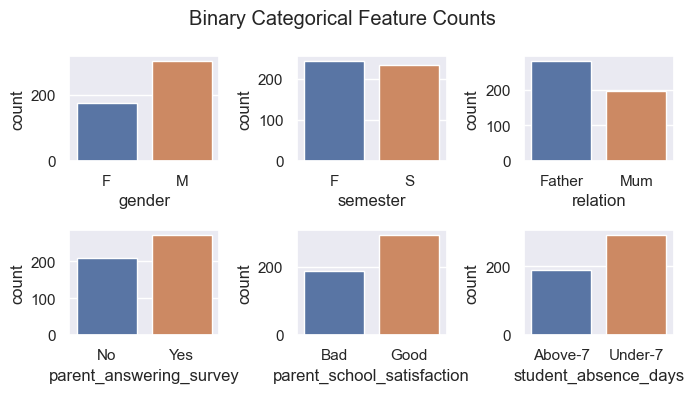

In [87]:
# Visualizing Binary Features Counts
fig, axs = plt.subplots(2,3)
fig.suptitle('Binary Categorical Feature Counts')

for i,feature in enumerate(BINARY_FEATURES):
    x = 0 if i <= 2 else 1
    y = i if i <= 2 else i-3
    sns.countplot(ax=axs[x,y], x=feature, data=binary_df)   

#### 3.3 Nominal Categorical Features

In [88]:
# Nominal Features
NOMINAL_FEATURES = list([category for category in CATEGORICAL_FEATURES if (len(data[category].unique())) != 2])
print(NOMINAL_FEATURES )
print(f'Total number of Nominal Categories: {len(NOMINAL_FEATURES)}')

['nationality', 'place_of_birth', 'stage_id', 'grade_id', 'section_id', 'topic']
Total number of Nominal Categories: 6


In [89]:
nominal_df = data[NOMINAL_FEATURES]
nominal_df.head()

,nationality,place_of_birth,stage_id,grade_id,section_id,topic
0,Kuwait,Kuwait,LowerLevel,G-04,A,IT
1,Kuwait,Kuwait,LowerLevel,G-04,A,IT
2,Kuwait,Kuwait,LowerLevel,G-04,A,IT
3,Kuwait,Kuwait,LowerLevel,G-04,A,IT
4,Kuwait,Kuwait,LowerLevel,G-04,A,IT


In [90]:
nationality_df = convert_to_df('nationality', nominal_df)
nationality_df

,nationality,counts,probability
0,Kuwait,179,0.374477
1,Lebanon,170,0.355649
2,Egypt,28,0.058577
3,SaudiArabia,22,0.046025
4,USA,17,0.035565
5,Jordan,12,0.025105
6,Venezuela,11,0.023013
7,Iran,9,0.018828
8,Tunis,7,0.014644
9,Morocco,6,0.012552


In [91]:
placeof_birth_df = convert_to_df('place_of_birth', nominal_df)
placeof_birth_df

,place_of_birth,counts,probability
0,Kuwait,180,0.376569
1,Lebanon,174,0.364017
2,Egypt,22,0.046025
3,SaudiArabia,19,0.039749
4,USA,16,0.033473
5,Jordan,16,0.033473
6,Venezuela,10,0.020921
7,Iran,9,0.018828
8,Tunis,9,0.018828
9,Morocco,6,0.012552


In [92]:
stage_id_df = convert_to_df('stage_id', nominal_df)
stage_id_df

,stage_id,counts,probability
0,LowerLevel,248,0.518828
1,MiddleSchool,197,0.412134
2,HighSchool,33,0.069038


In [93]:
grade_id_df = convert_to_df('grade_id', nominal_df)
grade_id_df

,grade_id,counts,probability
0,G-04,145,0.303347
1,G-07,116,0.242678
2,G-08,101,0.211297
3,G-06,48,0.100418
4,G-05,32,0.066946
5,G-09,13,0.027197
6,G-12,11,0.023013
7,G-11,5,0.01046
8,G-10,4,0.008368
9,G-02,3,0.006276


In [94]:
section_id_df = convert_to_df('section_id', nominal_df)
section_id_df

,section_id,counts,probability
0,A,281,0.587866
1,B,167,0.349372
2,C,30,0.062762


In [95]:
topic_df = convert_to_df('topic', nominal_df)
topic_df

,topic,counts,probability
0,IT,95,0.198745
1,Math,63,0.131799
2,Arabic,59,0.123431
3,Science,51,0.106695
4,English,45,0.094142
5,Quran,30,0.062762
6,Spanish,25,0.052301
7,French,24,0.050209
8,History,24,0.050209
9,Biology,22,0.046025


**stage_id'** and **'section_id'** have low nominal values but **'nationality'**, **'placeof_birth'**,**'grade_id'** and **'topic'** have high cardinality and also rare lables.

#### 3.4 Nominal Categorical Feature plots

First we plot low cardinalty data.

In [96]:
plt.rcParams["figure.figsize"] = [7.00, 4.00]

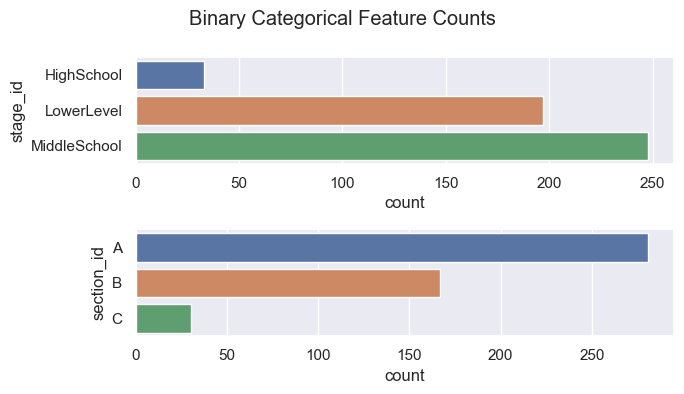

In [97]:
# Visualizing Binary Features Counts
fig, axs = plt.subplots(2)
fig.suptitle('Binary Categorical Feature Counts')

sns.countplot(ax=axs[0], y='stage_id', data=nominal_df)
sns.countplot(ax=axs[1], y='section_id', data=nominal_df);

In [98]:
# TODO Write description of the data
# TODO Normalize

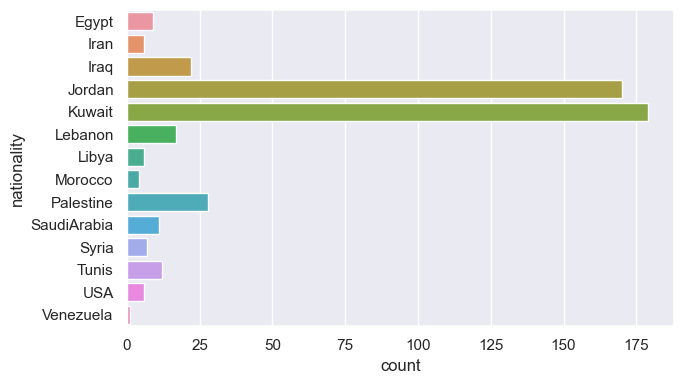

In [99]:
sns.countplot(y='nationality', data=nominal_df);

In [100]:
# TODO Write description of the data
# TODO Normalize

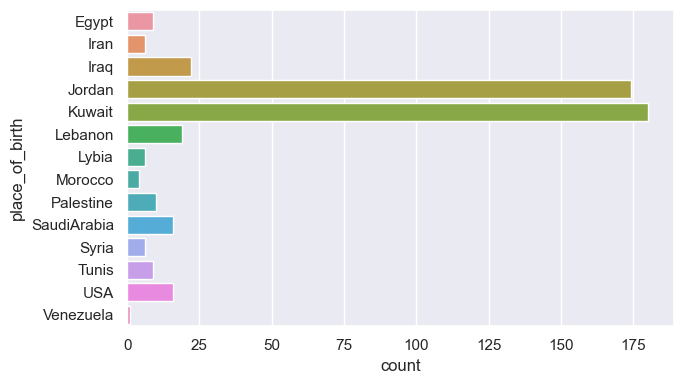

In [101]:
sns.countplot(y='place_of_birth', data=nominal_df);

In [102]:
# TODO Write description of the data
# TODO Normalize

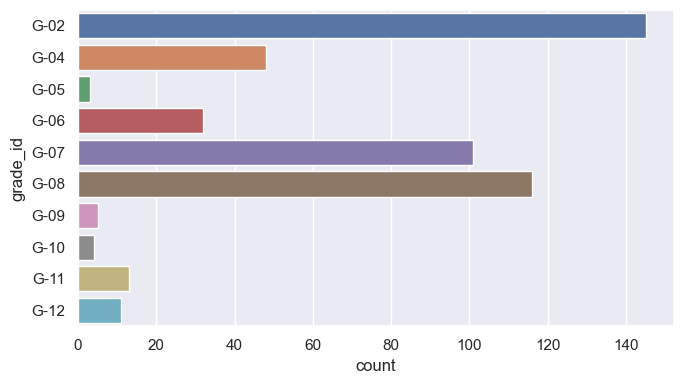

In [103]:
sns.countplot(y='grade_id', data=nominal_df);

In [104]:
# TODO Write description of the data
# TODO Normalize

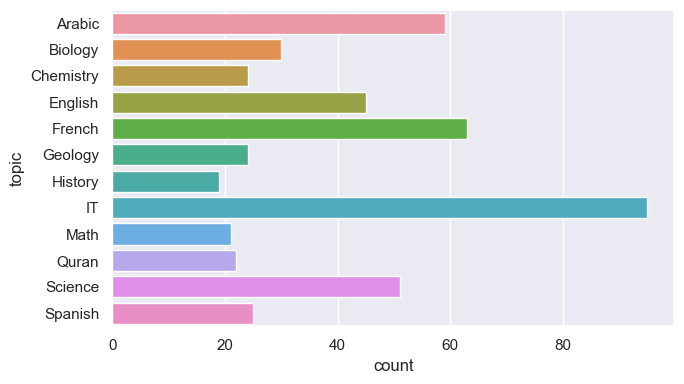

In [105]:
sns.countplot(y='topic', data=nominal_df);

In [106]:
# TODO Write description of the data
# TODO Normalize

### 4. Visualize Target Data.

In [107]:
target_df = convert_to_df(TARGET, data)
target_df

,class,counts,probability
0,M,211,0.441423
1,L,142,0.297071
2,H,125,0.261506


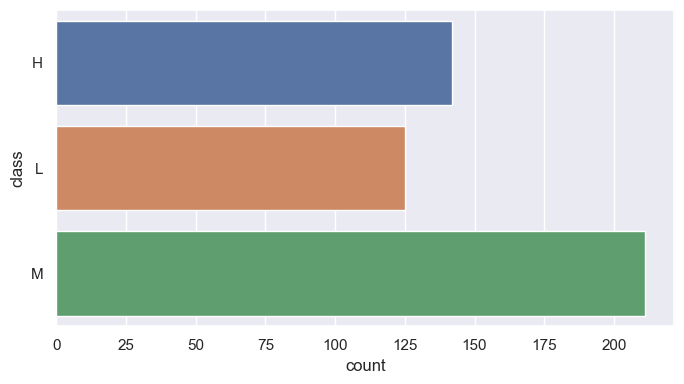

In [108]:
sns.countplot(y=TARGET, data=data);